In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

from pptoolbox.platform.preprocessing import preprocess_v2
from pptoolbox.preprocessing import SNV, MSC, SavitzkyGolay, Detrend
from pptoolbox.visualization import (plot_spectra, plot_loadings, plot_scree, fit_pca,
                                               generate_pc_df, plot_svp, initialize_theme, spectral_vector_properties)


from sklearn.feature_selection import f_classif, mutual_info_classif, chi2

from pathlib import Path

# import

In [26]:
datafolder_path = Path ("../data/processed")
label_df = pd.read_csv(datafolder_path / "cleaned_label.csv").set_index('lot_id')
X_visnir = pd.read_csv(datafolder_path / "cleaned_visnir_input.csv").set_index('lot_id')
X_exnir = pd.read_csv(datafolder_path / "cleaned_exnir_input.csv").set_index('lot_id')

spectral_ranges = {
    'visnir':{
        'cleaned_spectrum': X_visnir
    },
    'exnir':{
        'cleaned_spectrum': X_exnir
    }
}

In [27]:
label = 'Coffee'
label_type_list = ['clf' if label_df[col].dtypes == 'object' else 'reg' for col in label_df.columns]
param_label_map = dict(zip(label_df.columns, label_type_list))
param_label_map

{'concentration': 'reg', 'Date_Scanned': 'clf'}

# No Preprocessing

In [30]:
PREPROCESSING = 'No Preprocessing'

# output_dir = Path(f"../data/visualization/{PREPROCESSING}")
# output_dir.mkdir(exist_ok=True, parents=True)

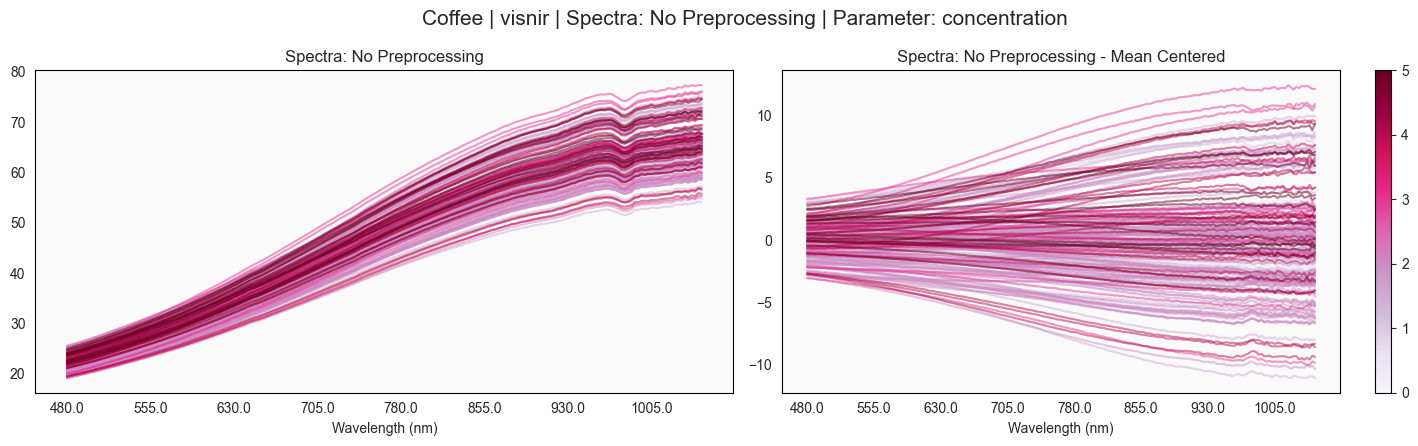

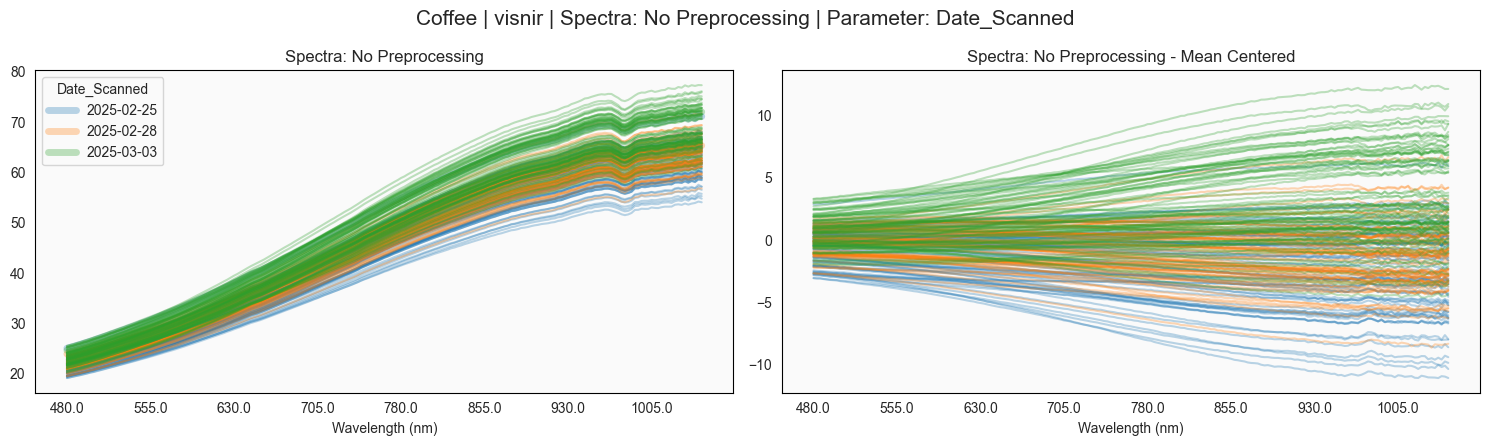

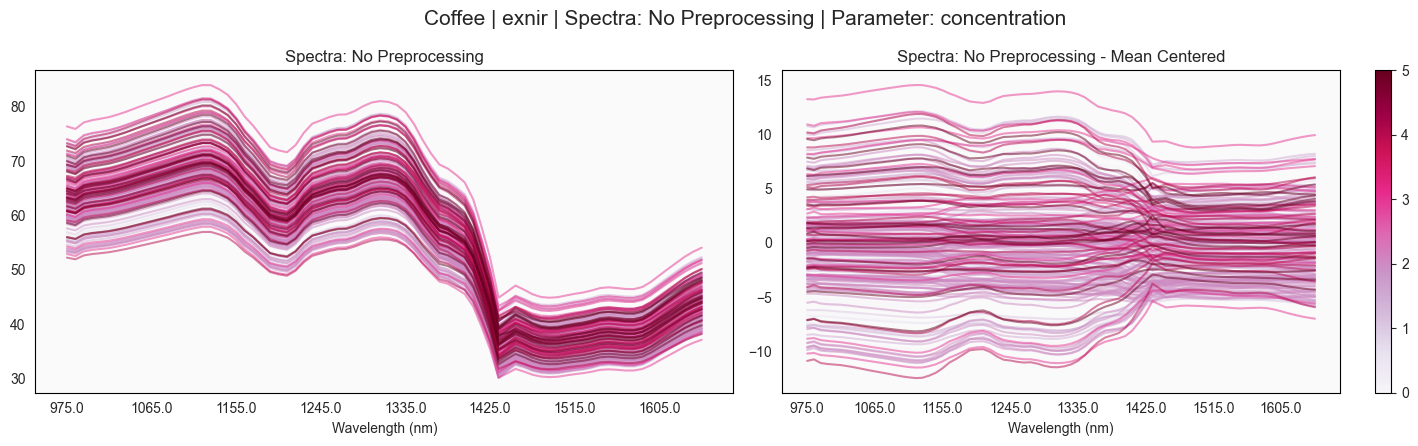

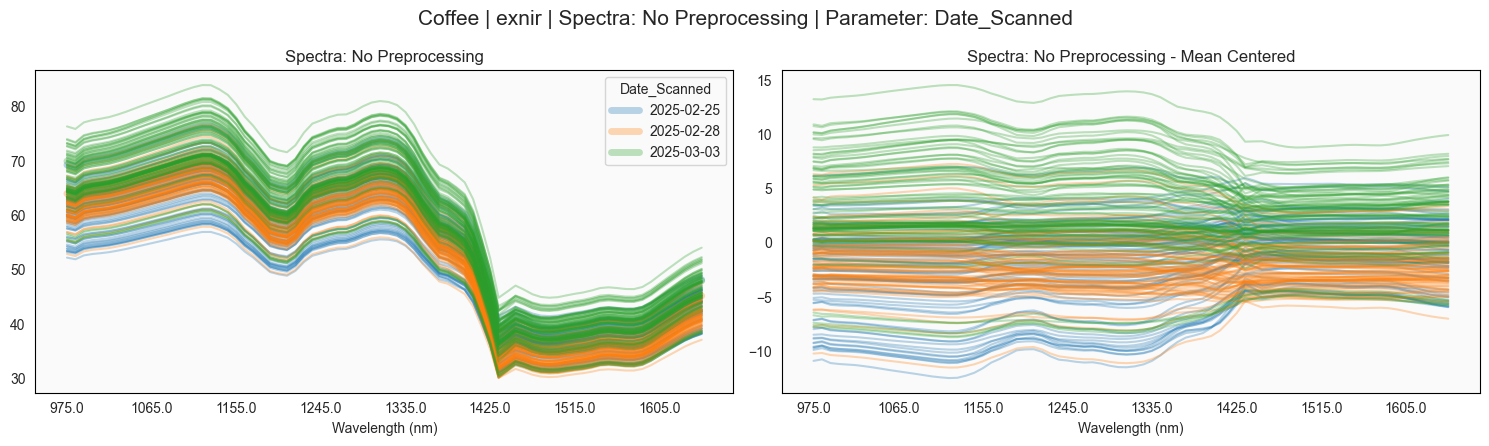

In [31]:
for spectral_range in spectral_ranges:
    SAMPLE_TYPE = f'{label} | {spectral_range}'
    selected_df = spectral_ranges[spectral_range]['cleaned_spectrum']

    plot_df = selected_df.copy()

    spectral_ranges[spectral_range]['NoPre_plot_df'] = plot_df
    
    for param, label_type in param_label_map.items():
        plot_spectra(plot_df, labels=label_df[[param]],
                    label_type=label_type,
                    spec_prep=PREPROCESSING,
                    sample_type=SAMPLE_TYPE,
                    # cmap=cmap
                    )
        # plt.savefig(output_dir/f'spectra_{spectrum}_{param}', bbox_inches='tight')
        # plt.close()


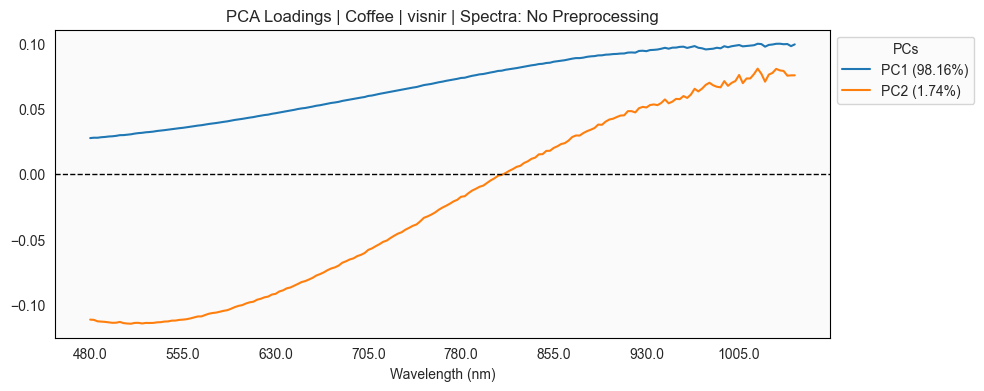

Total Explained Variance: 99.897% 
    Number of Components: 2


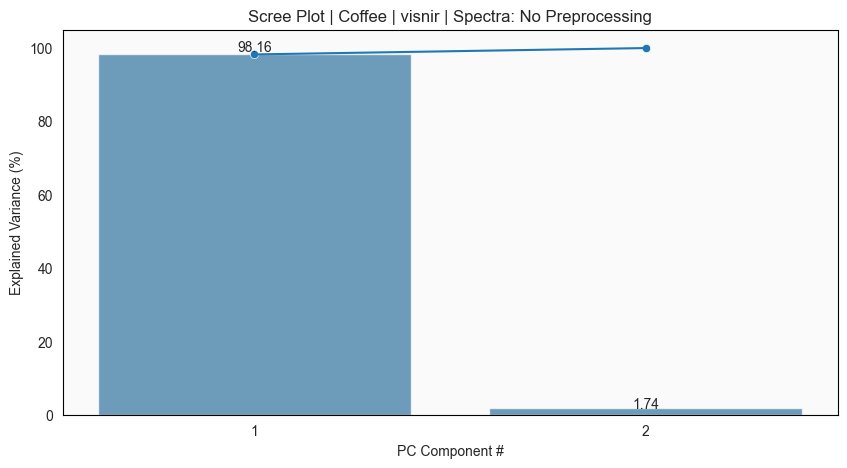

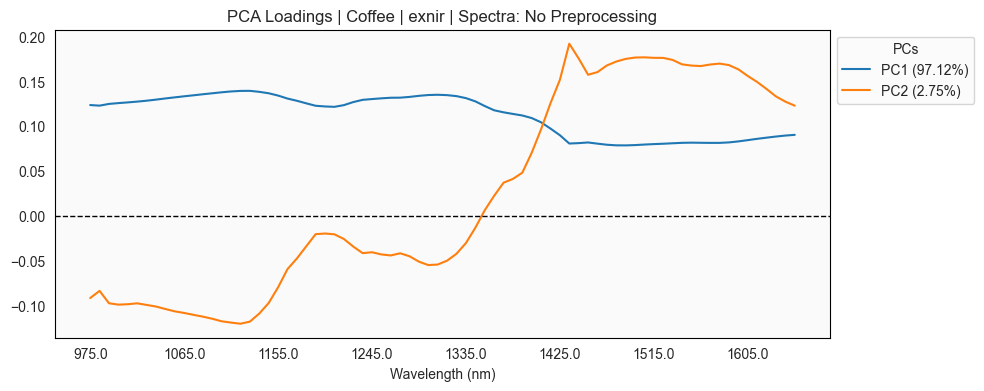

Total Explained Variance: 99.865% 
    Number of Components: 2


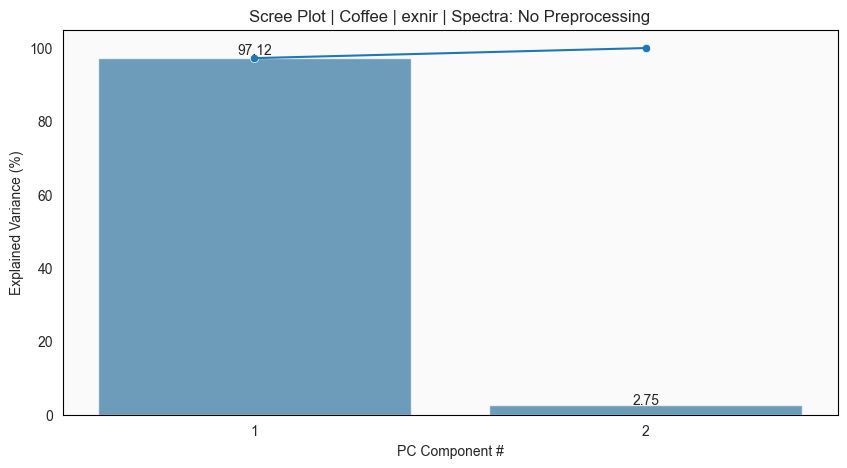

In [32]:
N_COMP = 0.99
RANDOM_STATE = 42
for spectral_range in spectral_ranges:
    SAMPLE_TYPE = f'{label} | {spectral_range}'
    plot_df = spectral_ranges[spectral_range]['NoPre_plot_df']

    fitted_pc, pc_labels = fit_pca(plot_df, N_COMP, RANDOM_STATE)

    spectral_ranges[spectral_range]['NoPre_fitted_pc'] = fitted_pc
    spectral_ranges[spectral_range]['NoPre_pc_labels'] = pc_labels

    fig2, ax2 = plot_loadings(plot_df, fitted_pc, pc_labels, 
                            spec_prep=PREPROCESSING, 
                            sample_type=SAMPLE_TYPE)
    
#     plt.savefig(output_dir/f'pca_loadings_{spectrum}', bbox_inches='tight')
    plt.show()
    plt.close()
    

    fig1, ax1 = plot_scree(fitted_pc,
                        spec_prep=PREPROCESSING, 
                        sample_type=SAMPLE_TYPE)    

    print(f"""Total Explained Variance: {fitted_pc.explained_variance_ratio_.sum()*100:.3f}% 
    Number of Components: {len(fitted_pc.explained_variance_ratio_)}""")

#     plt.savefig(output_dir/f'scree_{spectrum}', bbox_inches='tight')
    plt.show()
    plt.close()

c:\Users\RyanSoh\miniconda3\envs\testing\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



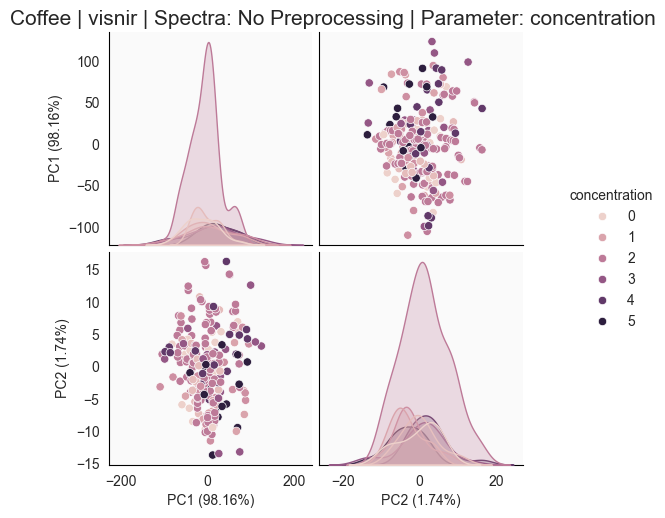

c:\Users\RyanSoh\miniconda3\envs\testing\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



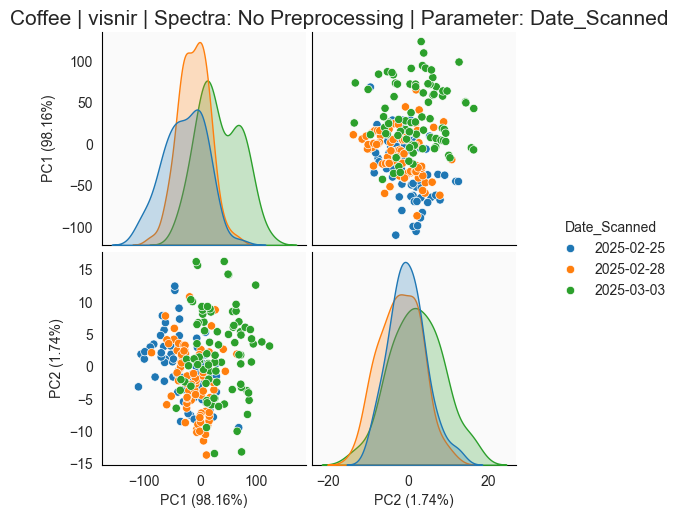

c:\Users\RyanSoh\miniconda3\envs\testing\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



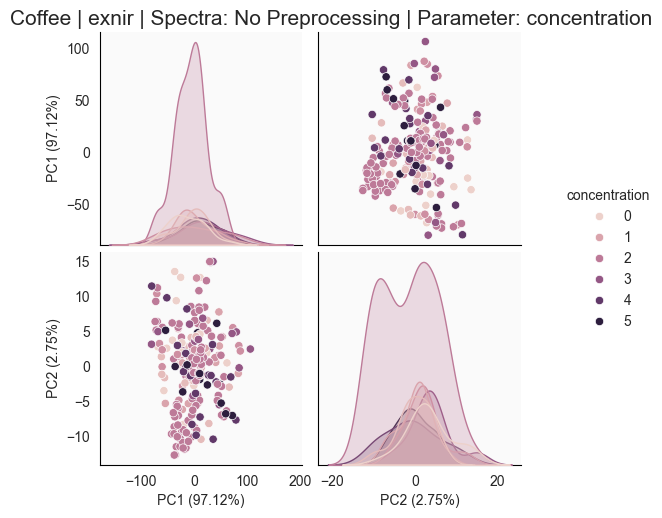

c:\Users\RyanSoh\miniconda3\envs\testing\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



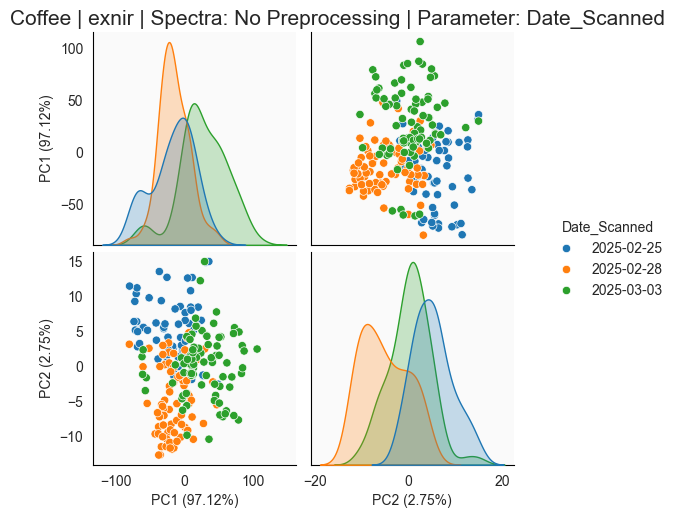

In [33]:
for spectral_range in spectral_ranges:
    SAMPLE_TYPE = f'{label} | {spectral_range}'

    plot_df = spectral_ranges[spectral_range]['NoPre_plot_df']
    fitted_pc = spectral_ranges[spectral_range]['NoPre_fitted_pc']
    pc_labels = spectral_ranges[spectral_range]['NoPre_pc_labels']

    for param in param_label_map.keys():
        pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df[[param]])
        sns.pairplot(data=pc_df.reset_index().drop('lot_id', axis=1), hue=param)
        plt.suptitle(f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING} | Parameter: {param}', y=1.02, size=15)
        # plt.savefig(output_dir/f'pca_{spectrum}_{param}', bbox_inches='tight')
        plt.show()
        plt.close()

# SNV

In [34]:
PREPROCESSING = 'SNV'
output_dir = Path(f"../data/visualization/{PREPROCESSING}")
output_dir.mkdir(exist_ok=True, parents=True)

In [37]:
for spectral_range in spectral_ranges:
    SAMPLE_TYPE = f'{label} | {spectral_range}'
    selected_df = spectral_ranges[spectral_range]['cleaned_spectrum']

    # CONFIGS
    snv_df = pd.DataFrame(SNV().fit_transform(selected_df), columns=selected_df.columns, index=selected_df.index)
    plot_df = snv_df.copy()

    spectral_ranges[spectral_range]['SNV_plot_df'] = plot_df
    
    for param, label_type in param_label_map.items():
        plot_spectra(plot_df, labels=label_df[[param]],
                    label_type=label_type,
                    spec_prep=PREPROCESSING,
                    sample_type=SAMPLE_TYPE,
                    # cmap=cmap
                    )
        plt.savefig(output_dir/f'spectra_{spectral_range}_{param}', bbox_inches='tight')
        plt.close()

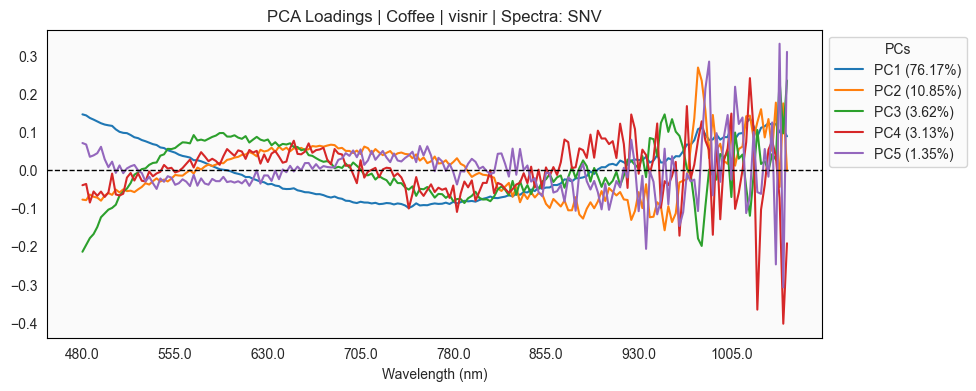

Total Explained Variance: 95.120% 
    Number of Components: 5


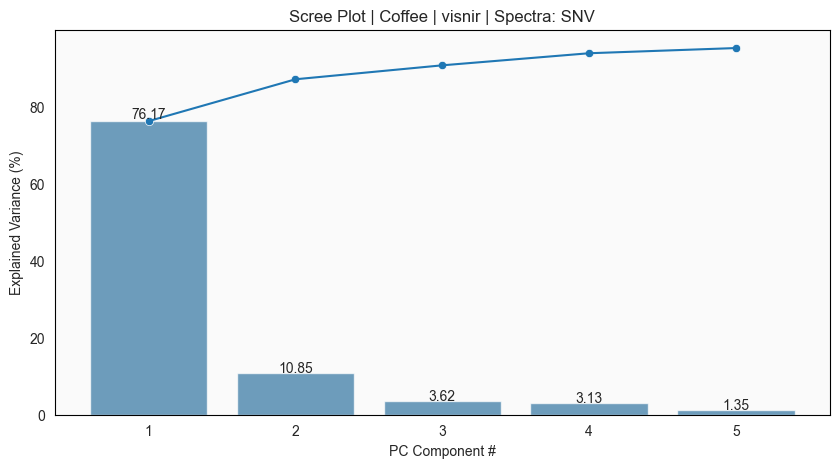

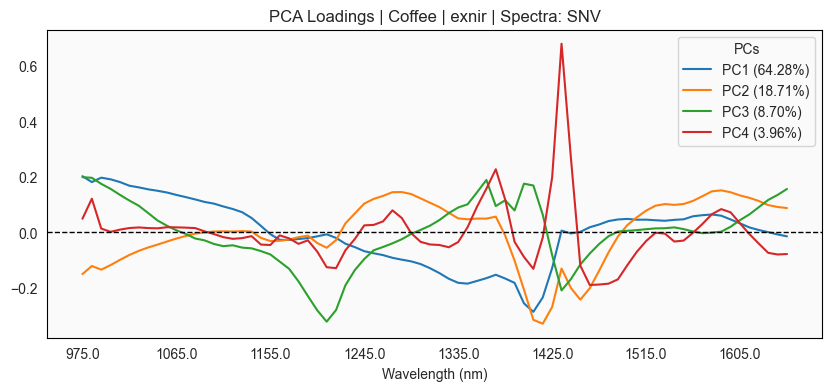

Total Explained Variance: 95.652% 
    Number of Components: 4


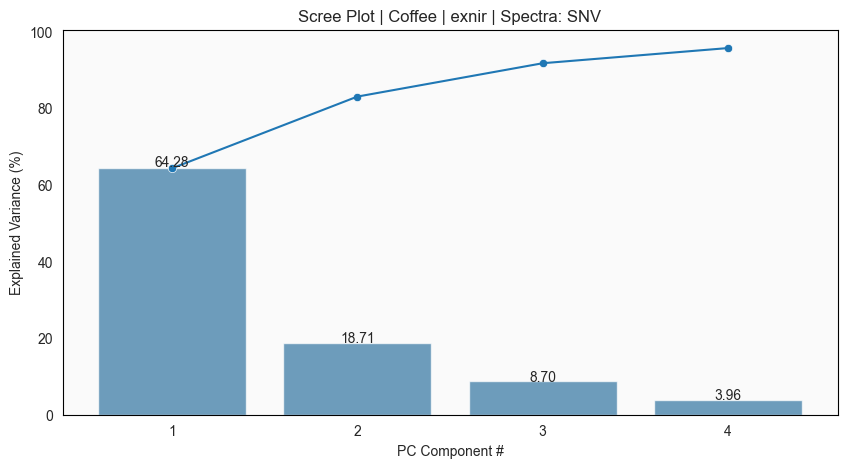

In [38]:
N_COMP = 0.95
RANDOM_STATE = 42
for spectral_range in spectral_ranges:
    SAMPLE_TYPE = f'{label} | {spectral_range}'
    plot_df = spectral_ranges[spectral_range]['SNV_plot_df']

    fitted_pc, pc_labels = fit_pca(plot_df, N_COMP, RANDOM_STATE)

    spectral_ranges[spectral_range]['SNV_fitted_pc'] = fitted_pc
    spectral_ranges[spectral_range]['SNV_pc_labels'] = pc_labels

    fig2, ax2 = plot_loadings(plot_df, fitted_pc, pc_labels, 
                            spec_prep=PREPROCESSING, 
                            sample_type=SAMPLE_TYPE)
    
    plt.savefig(output_dir/f'pca_loadings_{spectral_range}', bbox_inches='tight')
    plt.show()
    plt.close()

    fig1, ax1 = plot_scree(fitted_pc,
                        spec_prep=PREPROCESSING, 
                        sample_type=SAMPLE_TYPE)    

    print(f"""Total Explained Variance: {fitted_pc.explained_variance_ratio_.sum()*100:.3f}% 
    Number of Components: {len(fitted_pc.explained_variance_ratio_)}""")

    plt.savefig(output_dir/f'scree_{spectral_range}', bbox_inches='tight')
    plt.show()
    plt.close()

c:\Users\RyanSoh\miniconda3\envs\testing\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



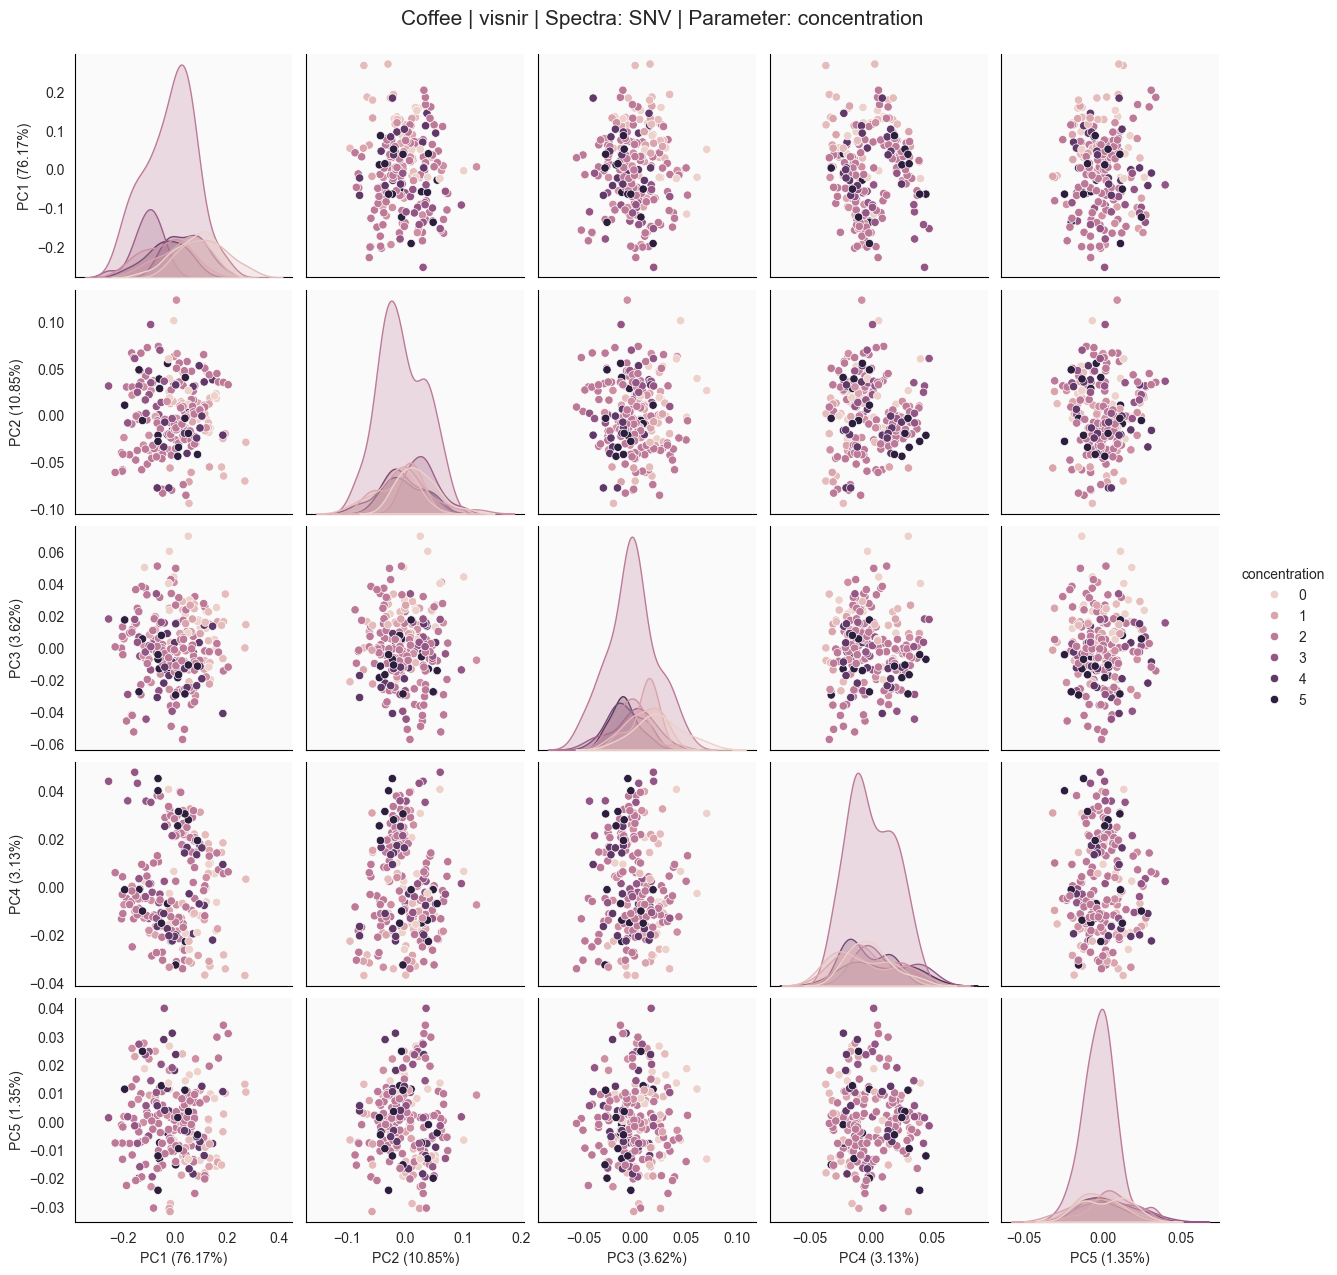

c:\Users\RyanSoh\miniconda3\envs\testing\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



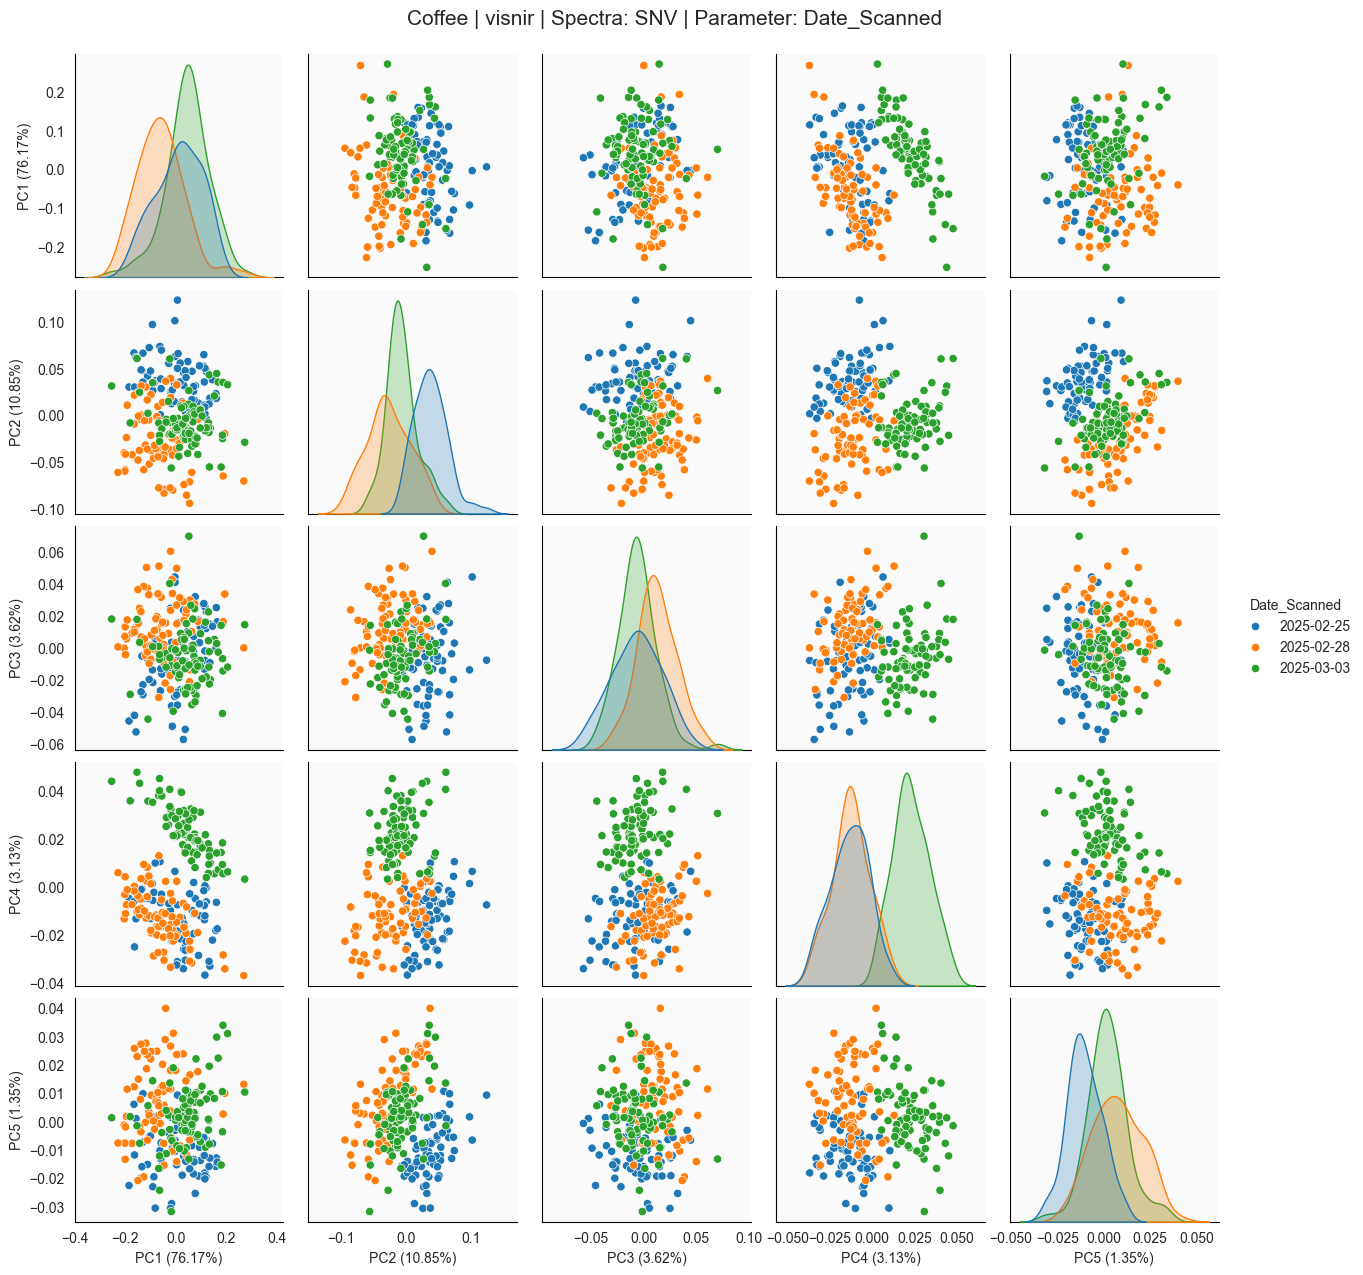

c:\Users\RyanSoh\miniconda3\envs\testing\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



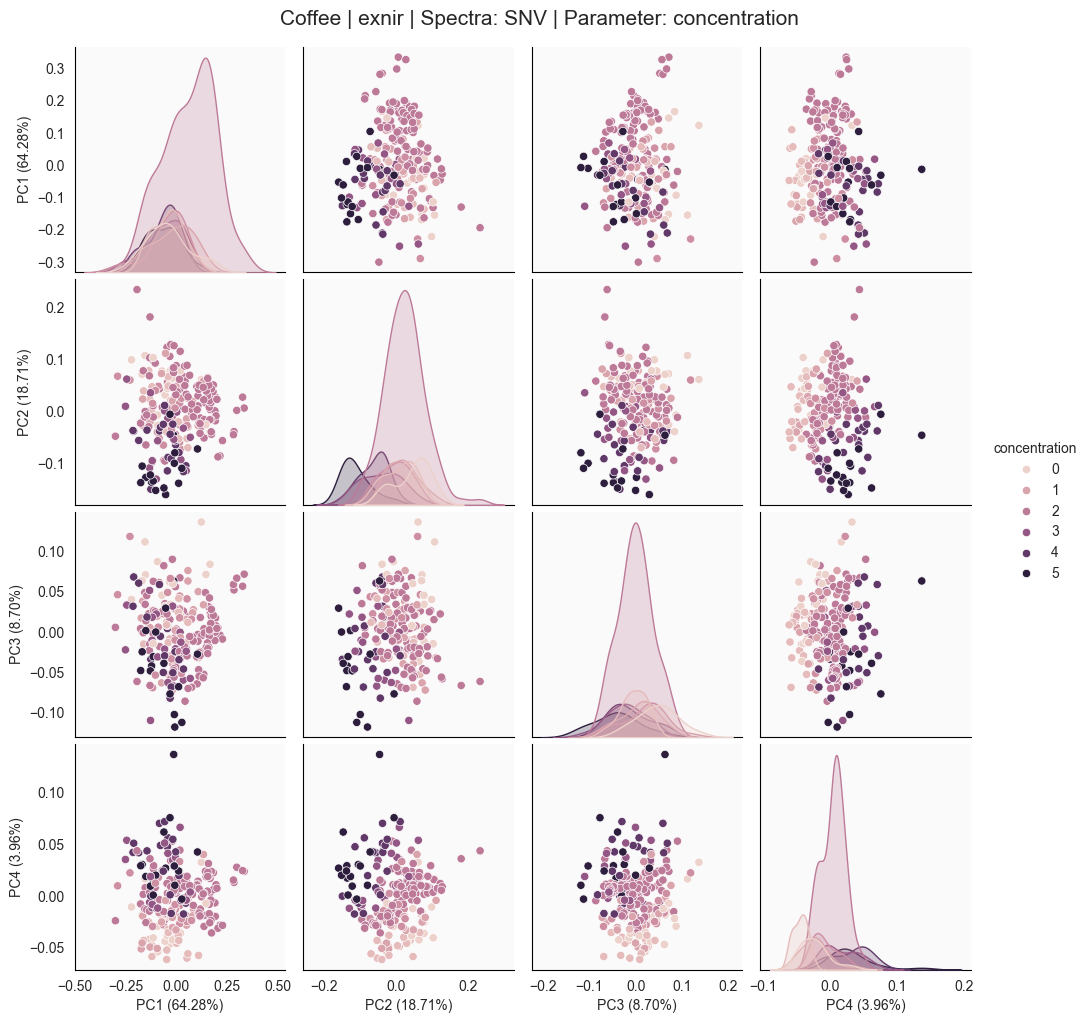

c:\Users\RyanSoh\miniconda3\envs\testing\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



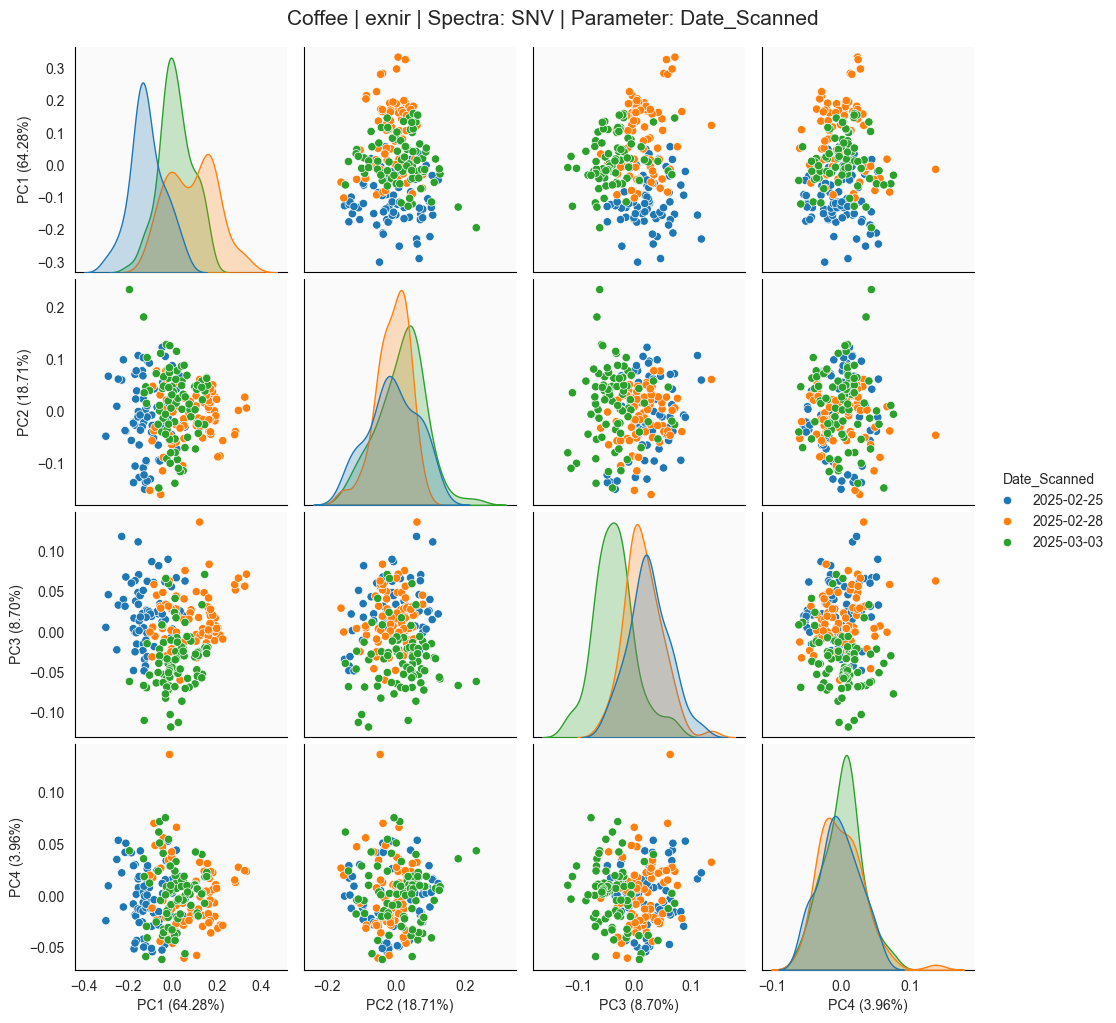

In [39]:
for spectral_range in spectral_ranges:
    SAMPLE_TYPE = f'{label} | {spectral_range}'
    
    plot_df = spectral_ranges[spectral_range]['SNV_plot_df']
    fitted_pc = spectral_ranges[spectral_range]['SNV_fitted_pc']
    pc_labels = spectral_ranges[spectral_range]['SNV_pc_labels']

    for param in param_label_map.keys():
        pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df[[param]])
        sns.pairplot(data=pc_df.reset_index().drop('lot_id', axis=1), hue=param)
        plt.suptitle(f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING} | Parameter: {param}', y=1.02, size=15)
        plt.savefig(output_dir/f'pca_{spectral_range}_{param}', bbox_inches='tight')
        plt.show()
        plt.close()

In [40]:
# from adjustText import adjust_text

# N_COMP = 0.96
# RANDOM_STATE = 42

# fitted_pc, pc_labels = fit_pca(plot_df, N_COMP, RANDOM_STATE)

# for param in param_label_map.keys():
#     pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df[[param]])
#     g = sns.pairplot(data=pc_df.reset_index().drop('lot_id', axis=1), hue=param, height=5)

#     # Set to track which indices have been labeled
#     labeled_indices = set()
#     label_all = 'yes'

#     # Add data labels (annotations)
#     for i, j in zip(*np.tril_indices_from(g.axes, -1)):  # Iterate over the lower triangular part of the plot matrix
#         ax = g.axes[i, j]  # Access each subplot
#         xlabel = g.x_vars[j]  # Get the variable name for the x-axis
#         ylabel = g.y_vars[i]  # Get the variable name for the y-axis
        
#         for k in range(pc_df.shape[0]):  # Iterate through the rows of the dataframe
#             index_label = pc_df.index[k]  # Get the index label
#             if label_all == 'yes' and index_label in (80079,80069,80059,80061): #80064,80060
#                 ax.annotate(index_label, (pc_df.iloc[k][xlabel], pc_df.iloc[k][ylabel]), fontsize=7, ha='left')
#             # else:
#             #     if index_label not in labeled_indices:  # Check if the index has already been labeled
#             #         ax.annotate(index_label, (pc_df.iloc[k][xlabel], pc_df.iloc[k][ylabel]), fontsize=8, ha='left')
#             #         labeled_indices.add(index_label)  # Mark this index as labeled            

#     plt.suptitle(f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING} | Parameter: {param}', y=1.02, size=15)
#     plt.show()

# Detrend

In [41]:
# # CONFIGS
# msc = Detrend()
# msc_df = pd.DataFrame(msc.fit_transform(raw_df), columns=raw_df.columns, index=raw_df.index)
# plot_df = msc_df.copy()
# PREPROCESSING = 'Detrend'

In [42]:
# for param, label_type in param_label_map.items():
#     plot_spectra(plot_df, labels=label_df[[param]],
#                  label_type=label_type,
#                  spec_prep=PREPROCESSING,
#                  sample_type=SAMPLE_TYPE,
#                  cmap=cmap)

In [43]:
# N_COMP = 0.99
# RANDOM_STATE = 42

# fitted_pc, pc_labels = fit_pca(plot_df, N_COMP, RANDOM_STATE)
# fig2, ax2 = plot_loadings(plot_df, fitted_pc, pc_labels, 
#                           spec_prep=PREPROCESSING, 
#                           sample_type=SAMPLE_TYPE)
# fig1, ax1 = plot_scree(fitted_pc,
#                        spec_prep=PREPROCESSING, 
#                        sample_type=SAMPLE_TYPE)
# print(f"""Total Explained Variance: {fitted_pc.explained_variance_ratio_.sum()*100:.3f}% 
# Number of Components: {len(fitted_pc.explained_variance_ratio_)}""")

In [44]:
# for param in param_label_map.keys():
#     pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df[[param]])
#     sns.pairplot(data=pc_df.reset_index().drop('lot_id', axis=1), hue=param)
#     plt.suptitle(f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING} | Parameter: {param}', y=1.02, size=15)

In [45]:
# fig = make_subplots(rows=3, cols= 2, 
#                     subplot_titles=['F Test Spectra', 'F Test PCA', 
#                                     'Mutual Info Spectra', 'Mutual Info PCA',
#                                     'Chi2 Spectra', 'Chi2 PCA'],
#                     specs=[[{'secondary_y': True}, {'secondary_y': True}],
#                            [{'secondary_y': False}, {'secondary_y': False}],
#                            [{'secondary_y': True}, {'secondary_y': True}]],
#                     horizontal_spacing=0.15,
#                     vertical_spacing=0.1)

# title = f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING}'
# colors = px.colors.qualitative.Plotly
# pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df)
# n_comp = fitted_pc.n_components_

# for i, param in enumerate(param_label_map.keys()):
#     try:
#         f_reg_spec = f_classif(plot_df, label_df[param].values.ravel())
#         f_reg_pca = f_classif(pc_df.iloc[:, :n_comp], pc_df[param].values.ravel())
#         mms = MinMaxScaler()
#         scaled_spec = mms.fit_transform(plot_df)
#         scaled_pca = mms.fit_transform(pc_df.iloc[:, :n_comp])
#         mi_spec = mutual_info_classif(scaled_spec, label_df[param].values.ravel())
#         mi_pca = mutual_info_classif(scaled_pca, pc_df[param].values.ravel())
#         chi2_spec = chi2(scaled_spec, label_df[param].values.ravel())
#         chi2_pca = chi2(scaled_pca, pc_df[param].values.ravel())
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=mi_spec, marker_color=colors[i], name=param,
#                        opacity=0.8, showlegend=False),
#                        secondary_y=False,row=2, col=1)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=mi_pca, name=param, marker_color=colors[i],
#                        showlegend=False, opacity=0.8),
#                     secondary_y=False, row=2, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=2)
        
#     except:
#         pass

# # Add figure title
# fig.update_layout(title_text=title, height=1400, width=1400)
# fig.update_xaxes(title_text="Wavelengths (nm)", col=1)
# fig.update_xaxes(title_text="No. of PCs", col=2)

# # Set y-axes titles
# fig.update_yaxes(title_text="F value", secondary_y=False, row=1)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=1)
# fig.update_yaxes(title_text="Mutual Information", secondary_y=False, row=2)
# fig.update_yaxes(title_text="Chi2", secondary_y=False, row=3)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=3)

# fig.show()

# SNV-Detrend

In [46]:
# # CONFIGS
# snv_df = pd.DataFrame(Detrend().fit_transform(SNV().fit_transform(raw_df)), columns=raw_df.columns, index=raw_df.index)
# plot_df = snv_df.copy()
# PREPROCESSING = 'SNV-Detrend'

In [47]:
# for param, label_type in param_label_map.items():
#     plot_spectra(plot_df, labels=label_df[[param]],
#                  label_type=label_type,
#                  spec_prep=PREPROCESSING,
#                  sample_type=SAMPLE_TYPE,
#                  cmap=cmap)

In [48]:
# N_COMP = 0.99
# RANDOM_STATE = 42

# fitted_pc, pc_labels = fit_pca(plot_df, N_COMP, RANDOM_STATE)
# fig2, ax2 = plot_loadings(plot_df, fitted_pc, pc_labels, 
#                           spec_prep=PREPROCESSING, 
#                           sample_type=SAMPLE_TYPE)
# fig1, ax1 = plot_scree(fitted_pc,
#                        spec_prep=PREPROCESSING, 
#                        sample_type=SAMPLE_TYPE)
# print(f"""Total Explained Variance: {fitted_pc.explained_variance_ratio_.sum()*100:.3f}% 
# Number of Components: {len(fitted_pc.explained_variance_ratio_)}""")

In [49]:
# for param in param_label_map.keys():
#     pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df[[param]])
#     sns.pairplot(data=pc_df.reset_index().drop('lot_id', axis=1), hue=param)
#     plt.suptitle(f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING} | Parameter: {param}', y=1.02, size=15)

In [50]:
# fig = make_subplots(rows=3, cols= 2, 
#                     subplot_titles=['F Test Spectra', 'F Test PCA', 
#                                     'Mutual Info Spectra', 'Mutual Info PCA',
#                                     'Chi2 Spectra', 'Chi2 PCA'],
#                     specs=[[{'secondary_y': True}, {'secondary_y': True}],
#                            [{'secondary_y': False}, {'secondary_y': False}],
#                            [{'secondary_y': True}, {'secondary_y': True}]],
#                     horizontal_spacing=0.15,
#                     vertical_spacing=0.1)

# title = f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING}'
# colors = px.colors.qualitative.Plotly
# pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df)
# n_comp = fitted_pc.n_components_

# for i, param in enumerate(param_label_map.keys()):
#     try:
#         f_reg_spec = f_classif(plot_df, label_df[param].values.ravel())
#         f_reg_pca = f_classif(pc_df.iloc[:, :n_comp], pc_df[param].values.ravel())
#         mms = MinMaxScaler()
#         scaled_spec = mms.fit_transform(plot_df)
#         scaled_pca = mms.fit_transform(pc_df.iloc[:, :n_comp])
#         mi_spec = mutual_info_classif(scaled_spec, label_df[param].values.ravel())
#         mi_pca = mutual_info_classif(scaled_pca, pc_df[param].values.ravel())
#         chi2_spec = chi2(scaled_spec, label_df[param].values.ravel())
#         chi2_pca = chi2(scaled_pca, pc_df[param].values.ravel())
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=mi_spec, marker_color=colors[i], name=param,
#                        opacity=0.8, showlegend=False),
#                        secondary_y=False,row=2, col=1)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=mi_pca, name=param, marker_color=colors[i],
#                        showlegend=False, opacity=0.8),
#                     secondary_y=False, row=2, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=2)
        
#     except:
#         pass

# # Add figure title
# fig.update_layout(title_text=title, height=1400, width=1400)
# fig.update_xaxes(title_text="Wavelengths (nm)", col=1)
# fig.update_xaxes(title_text="No. of PCs", col=2)

# # Set y-axes titles
# fig.update_yaxes(title_text="F value", secondary_y=False, row=1)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=1)
# fig.update_yaxes(title_text="Mutual Information", secondary_y=False, row=2)
# fig.update_yaxes(title_text="Chi2", secondary_y=False, row=3)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=3)

# fig.show()

# SG1D9W2P

In [51]:
msc = SavitzkyGolay(deriv=1, window=9, polyorder=2)

PREPROCESSING = 'SG1D9W2P'
output_dir = Path(f"../data/visualization/{PREPROCESSING}")
output_dir.mkdir(exist_ok=True, parents=True)

In [54]:
for spectral_range in spectral_ranges:
    SAMPLE_TYPE = f'{label} | {spectral_range}'
    selected_df = spectral_ranges[spectral_range]['cleaned_spectrum']

    # CONFIGS
    msc_df = pd.DataFrame(msc.fit_transform(selected_df), 
                      columns=selected_df.columns[4:-4], index=selected_df.index)
    plot_df = msc_df.copy()

    spectral_ranges[spectral_range]['SG_plot_df'] = plot_df
    
    for param, label_type in param_label_map.items():
        plot_spectra(plot_df, labels=label_df[[param]],
                    label_type=label_type,
                    spec_prep=PREPROCESSING,
                    sample_type=SAMPLE_TYPE,
                    # cmap=cmap
                    )
        plt.savefig(output_dir/f'spectra_{spectral_range}_{param}', bbox_inches='tight')
        plt.close()

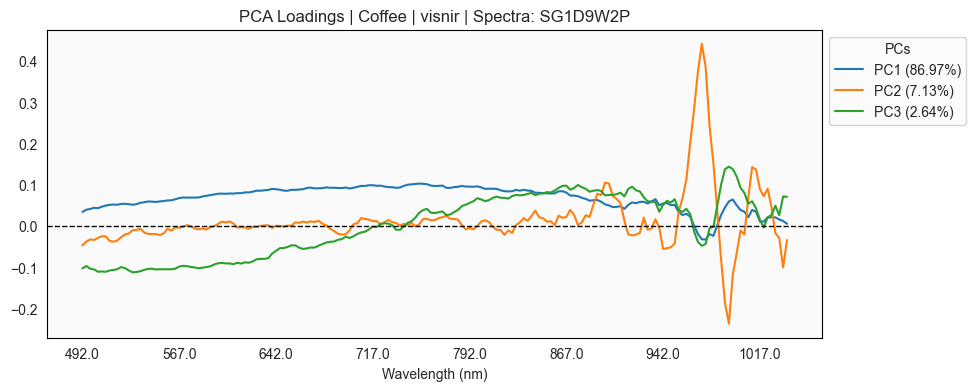

Total Explained Variance: 96.737% 
    Number of Components: 3


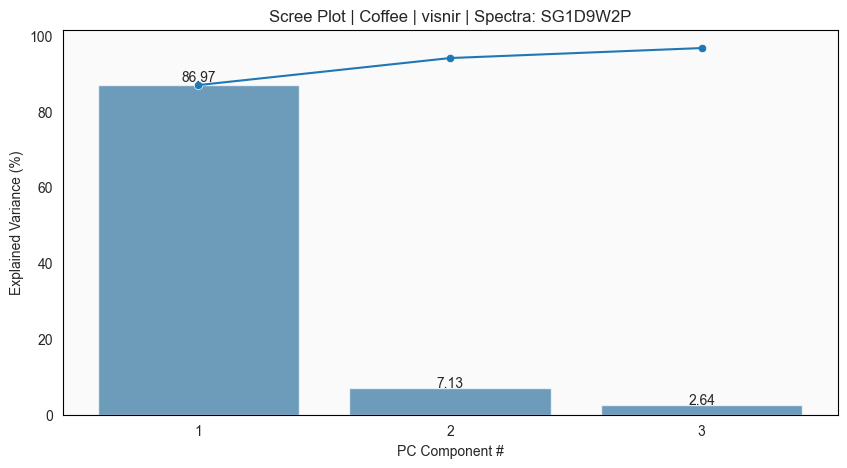

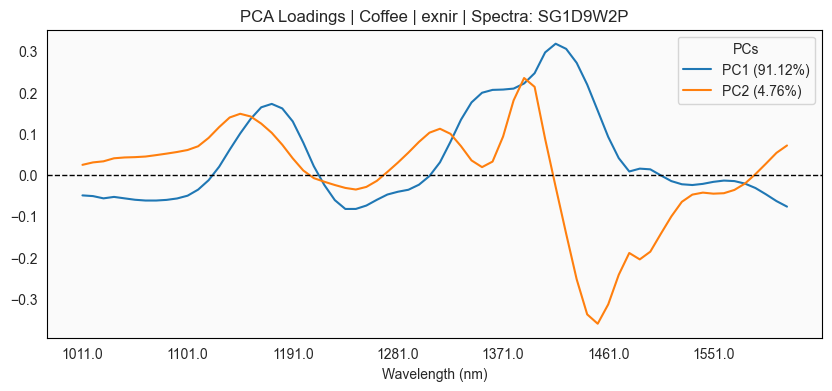

Total Explained Variance: 95.876% 
    Number of Components: 2


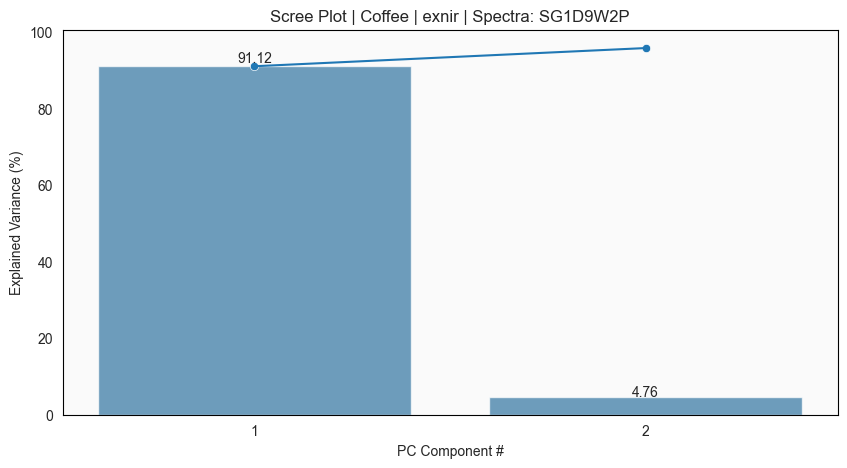

In [55]:
N_COMP = 0.95
RANDOM_STATE = 42
for spectral_range in spectral_ranges:
    SAMPLE_TYPE = f'{label} | {spectral_range}'
    plot_df = spectral_ranges[spectral_range]['SG_plot_df']

    fitted_pc, pc_labels = fit_pca(plot_df, N_COMP, RANDOM_STATE)
    spectral_ranges[spectral_range]['SG_fitted_pc'] = fitted_pc
    spectral_ranges[spectral_range]['SG_pc_labels'] = pc_labels

    fig2, ax2 = plot_loadings(plot_df, fitted_pc, pc_labels, 
                            spec_prep=PREPROCESSING, 
                            sample_type=SAMPLE_TYPE)
    
    plt.savefig(output_dir/f'pca_loadings_{spectral_range}', bbox_inches='tight')
    plt.show()
    plt.close()
    

    fig1, ax1 = plot_scree(fitted_pc,
                        spec_prep=PREPROCESSING, 
                        sample_type=SAMPLE_TYPE)    

    print(f"""Total Explained Variance: {fitted_pc.explained_variance_ratio_.sum()*100:.3f}% 
    Number of Components: {len(fitted_pc.explained_variance_ratio_)}""")

    plt.savefig(output_dir/f'scree_{spectral_range}', bbox_inches='tight')
    plt.show()
    plt.close()

c:\Users\RyanSoh\miniconda3\envs\testing\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



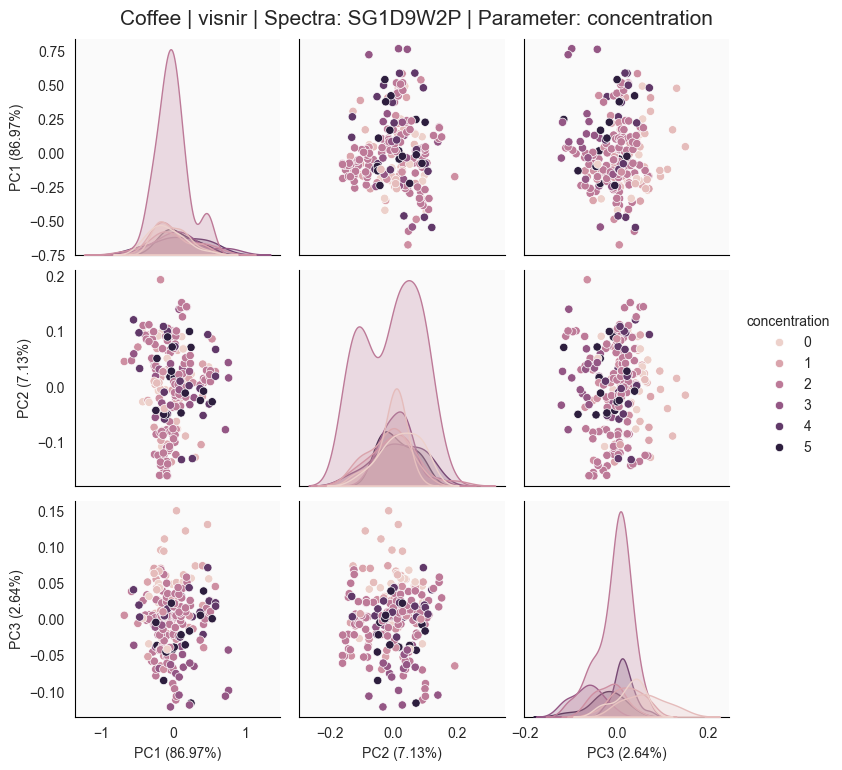

c:\Users\RyanSoh\miniconda3\envs\testing\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



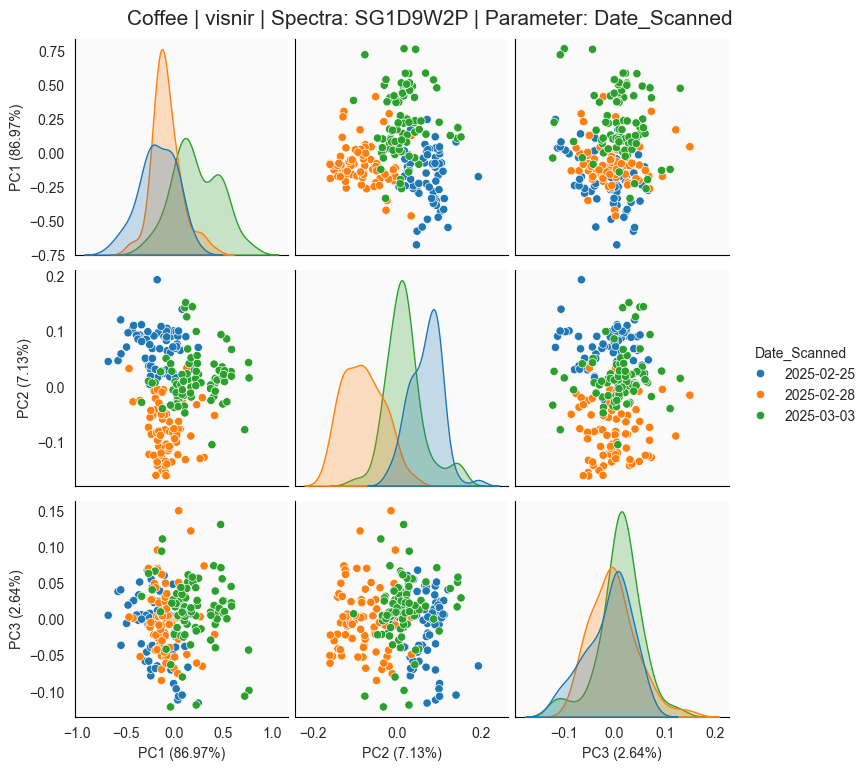

c:\Users\RyanSoh\miniconda3\envs\testing\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



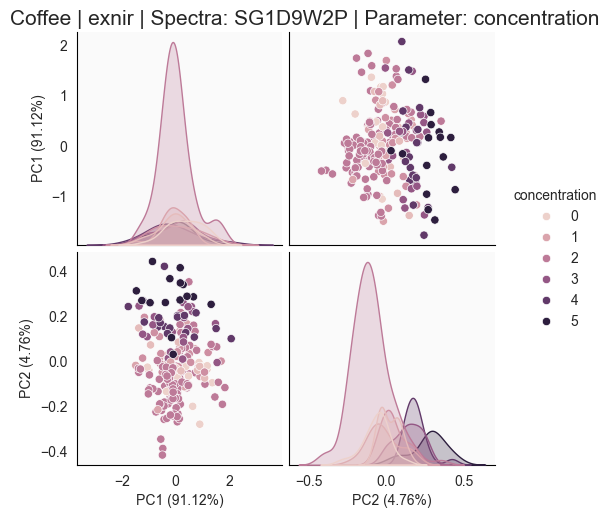

c:\Users\RyanSoh\miniconda3\envs\testing\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



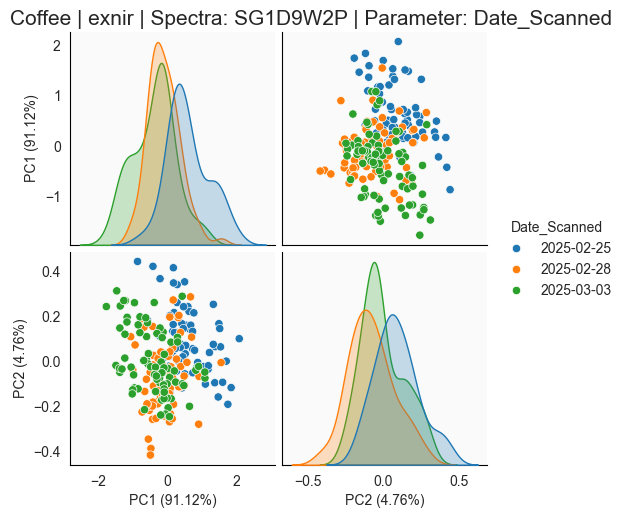

In [57]:
for spectral_range in spectral_ranges:
    SAMPLE_TYPE = f'{label} | {spectral_range}'
    
    plot_df = spectral_ranges[spectral_range]['SG_plot_df']
    fitted_pc = spectral_ranges[spectral_range]['SG_fitted_pc']
    pc_labels = spectral_ranges[spectral_range]['SG_pc_labels']

    for param in param_label_map.keys():
        pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df[[param]])
        sns.pairplot(data=pc_df.reset_index().drop('lot_id', axis=1), hue=param)
        plt.suptitle(f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING} | Parameter: {param}', y=1.02, size=15)
        plt.savefig(output_dir/f'pca_{spectral_range}_{param}', bbox_inches='tight')
        plt.show()
        plt.close()

In [ ]:
# N_COMP = 0.93
# RANDOM_STATE = 42

# fitted_pc, pc_labels = fit_pca(plot_df, N_COMP, RANDOM_STATE)

# for param in param_label_map.keys():
#     pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df[[param]])
#     g = sns.pairplot(data=pc_df.reset_index().drop('lot_id', axis=1), hue=param, height=5)

#     # Set to track which indices have been labeled
#     labeled_indices = set()
#     label_all = 'yes'

#     # Add data labels (annotations)
#     for i, j in zip(*np.tril_indices_from(g.axes, -1)):  # Iterate over the lower triangular part of the plot matrix
#         ax = g.axes[i, j]  # Access each subplot
#         xlabel = g.x_vars[j]  # Get the variable name for the x-axis
#         ylabel = g.y_vars[i]  # Get the variable name for the y-axis
        
#         for k in range(pc_df.shape[0]):  # Iterate through the rows of the dataframe
#             index_label = pc_df.index[k]  # Get the index label
#             # if label_all == 'yes' and pc_df['type'].iloc[k] == 'VLSFO':
#             if label_all == 'yes' and index_label in (80079,80069,80059,80061): #80064,80060
#                 ax.annotate(index_label, (pc_df.iloc[k][xlabel], pc_df.iloc[k][ylabel]), fontsize=7, ha='left')
#             # else:
#                 if index_label not in labeled_indices:  # Check if the index has already been labeled
#                     ax.annotate(index_label, (pc_df.iloc[k][xlabel], pc_df.iloc[k][ylabel]), fontsize=8, ha='left')
#                     labeled_indices.add(index_label)  # Mark this index as labeled            

#     plt.suptitle(f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING} | Parameter: {param}', y=1.02, size=15)
#     plt.show()

In [ ]:
# fig = make_subplots(rows=3, cols= 2, 
#                     subplot_titles=['F Test Spectra', 'F Test PCA', 
#                                     'Mutual Info Spectra', 'Mutual Info PCA',
#                                     'Chi2 Spectra', 'Chi2 PCA'],
#                     specs=[[{'secondary_y': True}, {'secondary_y': True}],
#                            [{'secondary_y': False}, {'secondary_y': False}],
#                            [{'secondary_y': True}, {'secondary_y': True}]],
#                     horizontal_spacing=0.15,
#                     vertical_spacing=0.1)

# title = f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING}'
# colors = px.colors.qualitative.Plotly
# pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df)
# n_comp = fitted_pc.n_components_

# for i, param in enumerate(param_label_map.keys()):
#     try:
#         f_reg_spec = f_classif(plot_df, label_df[param].values.ravel())
#         f_reg_pca = f_classif(pc_df.iloc[:, :n_comp], pc_df[param].values.ravel())
#         mms = MinMaxScaler()
#         scaled_spec = mms.fit_transform(plot_df)
#         scaled_pca = mms.fit_transform(pc_df.iloc[:, :n_comp])
#         mi_spec = mutual_info_classif(scaled_spec, label_df[param].values.ravel())
#         mi_pca = mutual_info_classif(scaled_pca, pc_df[param].values.ravel())
#         chi2_spec = chi2(scaled_spec, label_df[param].values.ravel())
#         chi2_pca = chi2(scaled_pca, pc_df[param].values.ravel())
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=mi_spec, marker_color=colors[i], name=param,
#                        opacity=0.8, showlegend=False),
#                        secondary_y=False,row=2, col=1)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=mi_pca, name=param, marker_color=colors[i],
#                        showlegend=False, opacity=0.8),
#                     secondary_y=False, row=2, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=2)
        
#     except:
#         pass

# # Add figure title
# fig.update_layout(title_text=title, height=1400, width=1400)
# fig.update_xaxes(title_text="Wavelengths (nm)", col=1)
# fig.update_xaxes(title_text="No. of PCs", col=2)

# # Set y-axes titles
# fig.update_yaxes(title_text="F value", secondary_y=False, row=1)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=1)
# fig.update_yaxes(title_text="Mutual Information", secondary_y=False, row=2)
# fig.update_yaxes(title_text="Chi2", secondary_y=False, row=3)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=3)

# fig.show()

# SNV-SG1D9W2P

In [ ]:
# # CONFIGS
# msc = SavitzkyGolay(deriv=1, window=9, polyorder=2)
# msc_df = pd.DataFrame(msc.fit_transform(SNV().fit_transform(raw_df)), 
#                       columns=raw_df.columns[4:-4], index=raw_df.index)
# plot_df = msc_df.copy()
# PREPROCESSING = 'SNV-SG1D4W2P'

In [ ]:
# for param, label_type in param_label_map.items():
#     plot_spectra(plot_df, labels=label_df[[param]],
#                  label_type=label_type,
#                  spec_prep=PREPROCESSING,
#                  sample_type=SAMPLE_TYPE,
#                  cmap=cmap)

In [ ]:
# N_COMP = 0.95
# RANDOM_STATE = 42

# fitted_pc, pc_labels = fit_pca(plot_df, N_COMP, RANDOM_STATE)
# fig2, ax2 = plot_loadings(plot_df, fitted_pc, pc_labels, 
#                           spec_prep=PREPROCESSING, 
#                           sample_type=SAMPLE_TYPE)
# fig1, ax1 = plot_scree(fitted_pc,
#                        spec_prep=PREPROCESSING, 
#                        sample_type=SAMPLE_TYPE)
# print(f"""Total Explained Variance: {fitted_pc.explained_variance_ratio_.sum()*100:.3f}% 
# Number of Components: {len(fitted_pc.explained_variance_ratio_)}""")

In [ ]:
# for param in param_label_map.keys():
#     pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df[[param]])
#     sns.pairplot(data=pc_df.reset_index().drop('lot_id', axis=1), hue=param)
#     plt.suptitle(f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING} | Parameter: {param}', y=1.02, size=15)

In [ ]:
# fig = make_subplots(rows=3, cols= 2, 
#                     subplot_titles=['F Test Spectra', 'F Test PCA', 
#                                     'Mutual Info Spectra', 'Mutual Info PCA',
#                                     'Chi2 Spectra', 'Chi2 PCA'],
#                     specs=[[{'secondary_y': True}, {'secondary_y': True}],
#                            [{'secondary_y': False}, {'secondary_y': False}],
#                            [{'secondary_y': True}, {'secondary_y': True}]],
#                     horizontal_spacing=0.15,
#                     vertical_spacing=0.1)

# title = f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING}'
# colors = px.colors.qualitative.Plotly
# pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df)
# n_comp = fitted_pc.n_components_

# for i, param in enumerate(param_label_map.keys()):
#     try:
#         f_reg_spec = f_classif(plot_df, label_df[param].values.ravel())
#         f_reg_pca = f_classif(pc_df.iloc[:, :n_comp], pc_df[param].values.ravel())
#         mms = MinMaxScaler()
#         scaled_spec = mms.fit_transform(plot_df)
#         scaled_pca = mms.fit_transform(pc_df.iloc[:, :n_comp])
#         mi_spec = mutual_info_classif(scaled_spec, label_df[param].values.ravel())
#         mi_pca = mutual_info_classif(scaled_pca, pc_df[param].values.ravel())
#         chi2_spec = chi2(scaled_spec, label_df[param].values.ravel())
#         chi2_pca = chi2(scaled_pca, pc_df[param].values.ravel())
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=mi_spec, marker_color=colors[i], name=param,
#                        opacity=0.8, showlegend=False),
#                        secondary_y=False,row=2, col=1)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=mi_pca, name=param, marker_color=colors[i],
#                        showlegend=False, opacity=0.8),
#                     secondary_y=False, row=2, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=2)
        
#     except:
#         pass

# # Add figure title
# fig.update_layout(title_text=title, height=1400, width=1400)
# fig.update_xaxes(title_text="Wavelengths (nm)", col=1)
# fig.update_xaxes(title_text="No. of PCs", col=2)

# # Set y-axes titles
# fig.update_yaxes(title_text="F value", secondary_y=False, row=1)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=1)
# fig.update_yaxes(title_text="Mutual Information", secondary_y=False, row=2)
# fig.update_yaxes(title_text="Chi2", secondary_y=False, row=3)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=3)

# fig.show()

# SG2D9W2P

In [ ]:
# data_split = ['spectra', 'label']
# spectra_meta = {}

# msc = SavitzkyGolay(deriv=2, window=9, polyorder=2)
# PREPROCESSING = 'SG2D9W2P'

# output_dir = Path(f"../data/visualization/{PREPROCESSING}")
# output_dir.mkdir(exist_ok=True, parents=True)

In [ ]:
# for spectrum in spectra:

#     for split in data_split:
#         key = f'{spectrum}_{split}'
#         if key in cleaned_spectra:
#             if split == 'spectra':
#                 selected_df = cleaned_spectra[key]
#             elif split == 'label':
#                 selected_labels = cleaned_spectra[key]
#             print(f'Assigned {key} to {split}_df')
    
#     SAMPLE_TYPE = f'{label} | {spectrum}'

#     # CONFIGS
#     msc_df = pd.DataFrame(msc.fit_transform(selected_df), 
#                       columns=selected_df.columns[4:-4], index=selected_df.index)
#     plot_df = msc_df.copy()

#     spectra_meta = {
#         **spectra_meta,
#         f'{spectrum}_plot_df' : plot_df
#     }
    
#     for param, label_type in param_label_map.items():
#         plot_spectra(plot_df, labels=selected_labels[[param]],
#                     label_type=label_type,
#                     spec_prep=PREPROCESSING,
#                     sample_type=SAMPLE_TYPE,
#                     cmap=cmap)
#         plt.savefig(output_dir/f'spectra_{spectrum}_{param}', bbox_inches='tight')
#         plt.close()

In [ ]:
# N_COMP = 0.99
# RANDOM_STATE = 42
# for spectrum in spectra:
#     SAMPLE_TYPE = f'{label} | {spectrum}'
#     plot_df = spectra_meta[f'{spectrum}_plot_df']

#     fitted_pc, pc_labels = fit_pca(plot_df, N_COMP, RANDOM_STATE)

#     spectra_meta = {
#             **spectra_meta,
#             f'{spectrum}_fitted_pc' : fitted_pc,
#             f'{spectrum}_pc_labels' : pc_labels,
#             }

#     fig2, ax2 = plot_loadings(plot_df, fitted_pc, pc_labels, 
#                             spec_prep=PREPROCESSING, 
#                             sample_type=SAMPLE_TYPE)
    
#     plt.savefig(output_dir/f'pca_loadings_{spectrum}', bbox_inches='tight')
#     plt.show()
#     plt.close()
    

#     fig1, ax1 = plot_scree(fitted_pc,
#                         spec_prep=PREPROCESSING, 
#                         sample_type=SAMPLE_TYPE)    

#     print(f"""Total Explained Variance: {fitted_pc.explained_variance_ratio_.sum()*100:.3f}% 
#     Number of Components: {len(fitted_pc.explained_variance_ratio_)}""")

#     plt.savefig(output_dir/f'scree_{spectrum}', bbox_inches='tight')
#     plt.show()
#     plt.close()

In [ ]:
# for spectrum in spectra:
#     SAMPLE_TYPE = f'{label} | {spectrum}'

#     for split in data_split:
#         key = f'{spectrum}_{split}'
#         if key in cleaned_spectra:
#             if split == 'spectra':
#                 selected_df = cleaned_spectra[key]
#             elif split == 'label':
#                 selected_labels = cleaned_spectra[key]
#             print(f'Assigned {key} to {split}_df')
    
#     plot_df = spectra_meta[f'{spectrum}_plot_df']
#     fitted_pc = spectra_meta[f'{spectrum}_fitted_pc']
#     pc_labels = spectra_meta[f'{spectrum}_pc_labels']

#     for param in param_label_map.keys():
#         pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=selected_labels[[param]])
#         sns.pairplot(data=pc_df.reset_index().drop('lot_id', axis=1), hue=param)
#         plt.suptitle(f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING} | Parameter: {param}', y=1.02, size=15)
#         plt.savefig(output_dir/f'pca_{spectrum}_{param}', bbox_inches='tight')
#         plt.show()
#         plt.close()

In [ ]:
# fig = make_subplots(rows=3, cols= 2, 
#                     subplot_titles=['F Test Spectra', 'F Test PCA', 
#                                     'Mutual Info Spectra', 'Mutual Info PCA',
#                                     'Chi2 Spectra', 'Chi2 PCA'],
#                     specs=[[{'secondary_y': True}, {'secondary_y': True}],
#                            [{'secondary_y': False}, {'secondary_y': False}],
#                            [{'secondary_y': True}, {'secondary_y': True}]],
#                     horizontal_spacing=0.15,
#                     vertical_spacing=0.1)

# title = f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING}'
# colors = px.colors.qualitative.Plotly
# pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df)
# n_comp = fitted_pc.n_components_

# for i, param in enumerate(param_label_map.keys()):
#     try:
#         f_reg_spec = f_classif(plot_df, label_df[param].values.ravel())
#         f_reg_pca = f_classif(pc_df.iloc[:, :n_comp], pc_df[param].values.ravel())
#         mms = MinMaxScaler()
#         scaled_spec = mms.fit_transform(plot_df)
#         scaled_pca = mms.fit_transform(pc_df.iloc[:, :n_comp])
#         mi_spec = mutual_info_classif(scaled_spec, label_df[param].values.ravel())
#         mi_pca = mutual_info_classif(scaled_pca, pc_df[param].values.ravel())
#         chi2_spec = chi2(scaled_spec, label_df[param].values.ravel())
#         chi2_pca = chi2(scaled_pca, pc_df[param].values.ravel())
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=mi_spec, marker_color=colors[i], name=param,
#                        opacity=0.8, showlegend=False),
#                        secondary_y=False,row=2, col=1)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=mi_pca, name=param, marker_color=colors[i],
#                        showlegend=False, opacity=0.8),
#                     secondary_y=False, row=2, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=2)
        
#     except:
#         pass

# # Add figure title
# fig.update_layout(title_text=title, height=1400, width=1400)
# fig.update_xaxes(title_text="Wavelengths (nm)", col=1)
# fig.update_xaxes(title_text="No. of PCs", col=2)

# # Set y-axes titles
# fig.update_yaxes(title_text="F value", secondary_y=False, row=1)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=1)
# fig.update_yaxes(title_text="Mutual Information", secondary_y=False, row=2)
# fig.update_yaxes(title_text="Chi2", secondary_y=False, row=3)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=3)

# fig.show()

# SNV-SG2D9W2P

In [ ]:
# # CONFIGS
# msc = SavitzkyGolay(deriv=2, window=9, polyorder=2)
# msc_df = pd.DataFrame(msc.fit_transform(SNV().fit_transform(raw_df)), 
#                       columns=raw_df.columns[4:-4], index=raw_df.index)
# plot_df = msc_df.copy()
# PREPROCESSING = 'SNV-SG2D9W2P'

In [ ]:
# for param, label_type in param_label_map.items():
#     plot_spectra(plot_df, labels=label_df[[param]],
#                  label_type=label_type,
#                  spec_prep=PREPROCESSING,
#                  sample_type=SAMPLE_TYPE,
#                  cmap=cmap)

In [ ]:
# N_COMP = 0.93
# RANDOM_STATE = 42

# fitted_pc, pc_labels = fit_pca(plot_df, N_COMP, RANDOM_STATE)
# fig2, ax2 = plot_loadings(plot_df, fitted_pc, pc_labels, 
#                           spec_prep=PREPROCESSING, 
#                           sample_type=SAMPLE_TYPE)
# fig1, ax1 = plot_scree(fitted_pc,
#                        spec_prep=PREPROCESSING, 
#                        sample_type=SAMPLE_TYPE)
# print(f"""Total Explained Variance: {fitted_pc.explained_variance_ratio_.sum()*100:.3f}% 
# Number of Components: {len(fitted_pc.explained_variance_ratio_)}""")

In [ ]:
# for param in param_label_map.keys():
#     pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df[[param]])
#     sns.pairplot(data=pc_df.reset_index().drop('lot_id', axis=1), hue=param)
#     plt.suptitle(f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING} | Parameter: {param}', y=1.02, size=15)

In [ ]:
# fig = make_subplots(rows=3, cols= 2, 
#                     subplot_titles=['F Test Spectra', 'F Test PCA', 
#                                     'Mutual Info Spectra', 'Mutual Info PCA',
#                                     'Chi2 Spectra', 'Chi2 PCA'],
#                     specs=[[{'secondary_y': True}, {'secondary_y': True}],
#                            [{'secondary_y': False}, {'secondary_y': False}],
#                            [{'secondary_y': True}, {'secondary_y': True}]],
#                     horizontal_spacing=0.15,
#                     vertical_spacing=0.1)

# title = f'{SAMPLE_TYPE} | Spectra: {PREPROCESSING}'
# colors = px.colors.qualitative.Plotly
# pc_df = generate_pc_df(plot_df, fitted_pc, pc_labels, labels=label_df)
# n_comp = fitted_pc.n_components_

# for i, param in enumerate(param_label_map.keys()):
#     try:
#         f_reg_spec = f_classif(plot_df, label_df[param].values.ravel())
#         f_reg_pca = f_classif(pc_df.iloc[:, :n_comp], pc_df[param].values.ravel())
#         mms = MinMaxScaler()
#         scaled_spec = mms.fit_transform(plot_df)
#         scaled_pca = mms.fit_transform(pc_df.iloc[:, :n_comp])
#         mi_spec = mutual_info_classif(scaled_spec, label_df[param].values.ravel())
#         mi_pca = mutual_info_classif(scaled_pca, pc_df[param].values.ravel())
#         chi2_spec = chi2(scaled_spec, label_df[param].values.ravel())
#         chi2_pca = chi2(scaled_pca, pc_df[param].values.ravel())
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=f_reg_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=1, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=f_reg_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=1, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=mi_spec, marker_color=colors[i], name=param,
#                        opacity=0.8, showlegend=False),
#                        secondary_y=False,row=2, col=1)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=mi_pca, name=param, marker_color=colors[i],
#                        showlegend=False, opacity=0.8),
#                     secondary_y=False, row=2, col=2)
        
#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=1)

#         fig.add_trace(
#             go.Scatter(x=plot_df.columns, y=chi2_spec[1], name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=1)
        
#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[0], marker_color=colors[i], name=param,
#                        opacity=0.5, showlegend=False),
#                        secondary_y=False,row=3, col=2)

#         fig.add_trace(
#             go.Scatter(x=pc_df.columns[:n_comp], y=chi2_pca[1], showlegend=False,
#                        name=param, marker_color=colors[i]),
#                     secondary_y=True, row=3, col=2)
        
#     except:
#         pass

# # Add figure title
# fig.update_layout(title_text=title, height=1400, width=1400)
# fig.update_xaxes(title_text="Wavelengths (nm)", col=1)
# fig.update_xaxes(title_text="No. of PCs", col=2)

# # Set y-axes titles
# fig.update_yaxes(title_text="F value", secondary_y=False, row=1)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=1)
# fig.update_yaxes(title_text="Mutual Information", secondary_y=False, row=2)
# fig.update_yaxes(title_text="Chi2", secondary_y=False, row=3)
# fig.update_yaxes(title_text="p value", secondary_y=True, row=3)

# fig.show()